In [14]:
import pandas as pd
import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import Range1d
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

output_notebook() # Run once to get inline figures

import matplotlib.pyplot as plt

# SET PLOTTING SETTINGS
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
BIGGEST_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

Loading BokehJS ...

In [2]:
d = pd.read_excel('../Data/StochSS_Param_scan_results.xls')

x  = d['k_burst']
y1 = d['mean']
y2 = d['variance']
y3 = d['Fano']
y4 = np.sqrt(d['variance'])/(d['mean']+.0)

# Bokeh

In [3]:
p = figure(tools=TOOLS)
p1 = figure(tools=TOOLS)
p2 = figure(tools=TOOLS)
p3 = figure(tools=TOOLS)

m = "μ"
f = "Fano factor (σ^2 / μ)"
v = "Variance (σ^2)"
n = "Noise (σ / μ)"

p.square(x, y1, legend = m, color="red")
p.line(x, y1,   legend = m, line_color="red")

p1.circle(x, y2, legend = v, fill_color=None,line_color="Blueviolet")
p1.line(x, y2,   legend = v, line_color="Blueviolet")

p2.circle(x, y3, legend = f, color="green")
p2.line(x, y3,   legend = f, line_color="green")
p2.y_range = Range1d(5.1,5.9)

p3.square(x, y4, legend=n,color="deepskyblue")
p3.line(x, y4, legend=n, line_color="deepskyblue")
p3.y_range = Range1d(0,0.77)

p.xaxis.axis_label = "k_bursting"
p1.xaxis.axis_label = "k_bursting"
p2.xaxis.axis_label = "k_bursting"
p3.xaxis.axis_label = "k_bursting"

for plot in [p,p1,p2,p3]:
    plot.x_range = Range1d(0,10)
    plot.xaxis.axis_label_text_font_size = "16pt"
    plot.xaxis.major_label_text_font_size = "14pt"
    plot.yaxis.axis_label_text_font_size = "16pt"
    plot.yaxis.major_label_text_font_size = "14pt"
    plot.plot_height = 300
    plot.plot_width = int(2.2*plot.plot_height)
    plot.legend.label_text_font_size = "14pt"


show(p)
show(p1)
show(p2)
show(p3)

# Matplotlib

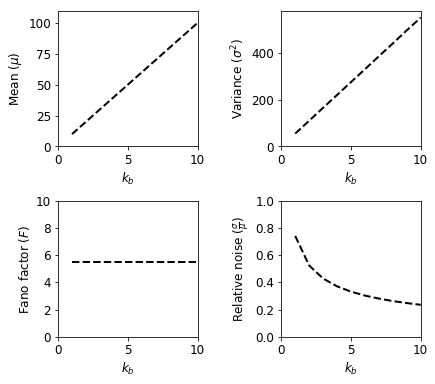

In [20]:
plt.subplot(221)
plt.plot(x,y1, '--k', linewidth=2.0) 
plt.axis([0, 10, 0, 110])
plt.ylabel(r'Mean ($\mu$)')
plt.xlabel(r'$k_{b}$')

plt.subplot(222)
plt.plot(x,y2, '--k', linewidth=2.0) 
plt.axis([0, 10, 0, 580])
plt.ylabel(r'Variance ($\sigma^2$)')
plt.xlabel(r'$k_{b}$')

plt.subplot(223)
plt.plot(x,y3, '--k', linewidth=2.0) 
plt.axis([0, 10, 0, 10])
plt.ylabel(r'Fano factor ($F$)')
plt.xlabel(r'$k_{b}$')

plt.subplot(224)
plt.plot(x,y4, '--k', linewidth=2.0) 
plt.axis([0, 10, 0, 1])
plt.ylabel(r'Relative noise ($\frac{\sigma}{\mu}$)')
plt.xlabel(r'$k_{b}$')

fig = plt.gcf()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

fig.set_size_inches(6.5, 6)
fig.savefig('../Figures/Figure_3.pdf', bbox_inches='tight')
plt.show()